## KNN Approach



### Setup

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

from pathlib import Path
import os

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


from pyMLaux import plot_history, evaluate_classification_result,plot_2d_prediction


In [11]:
# read dynamic path
base_dir = Path(os.getcwd())/"implementation"
data_dir = base_dir / "data/source/"
result_dir = base_dir / "data/results/"

### load & prepare dataset

the following code needs to be adapted for each protein-ligand complex individually

In [12]:
nn_data_raw = pd.read_csv(data_dir/"ACHE/ache_pca.csv")

nn_data_raw

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,21,22,23,24,25,26,27,28,29,LABEL
0,0,2.775103,1.569092,-1.633093,0.509205,-0.365362,0.464463,-1.344698,0.340212,1.195709,...,-0.426203,0.157809,-0.384176,-0.775244,-0.265311,0.172972,-0.078754,0.175435,0.157472,active
1,1,1.160143,0.745342,3.626592,-0.482753,-0.501234,-0.702610,0.148980,1.191717,-0.315544,...,-0.197789,-0.733598,0.058455,0.356964,0.004727,0.491466,0.056198,-0.304857,0.442595,active
2,2,1.347487,-1.066134,0.930806,-0.326445,1.909936,0.292744,0.015491,0.427259,0.980201,...,-0.371311,-0.441166,-0.295813,0.288092,-0.258665,-0.158248,0.097048,-0.130219,-0.302125,active
3,3,4.217589,-0.574677,1.399565,1.361755,-1.065899,0.487160,0.041603,0.652388,0.670705,...,-0.035638,0.009457,0.003479,0.175791,0.480889,-0.397306,-0.118256,-0.429759,0.046488,active
4,4,2.269227,-0.097871,0.590080,0.325115,1.649822,0.056987,-0.778049,0.349009,0.760214,...,-0.450115,-0.645917,0.283596,-0.353558,-0.340660,0.206826,-0.132083,-0.185250,0.394408,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,998,-0.609818,-0.656158,-0.131409,0.554176,-0.437736,-0.673396,-0.254374,-0.307080,-0.299093,...,0.298212,0.244026,0.018224,0.040865,-0.106602,0.218396,-0.221769,0.094682,0.076756,active
999,999,-0.418320,-0.805650,-0.109816,-0.376300,-0.549992,-0.458199,0.583562,0.367584,0.043453,...,-0.381802,0.069187,-0.053126,0.357976,0.090901,0.410654,-0.183452,0.216238,-0.213667,active
1000,1000,-1.637342,-0.955758,0.168724,0.684614,-0.258857,-0.898800,0.085315,0.578703,0.398927,...,0.703583,0.167216,-0.588820,-0.750097,-0.244467,0.106357,-0.130821,0.226009,-0.169840,active
1001,1001,0.573375,-0.944395,-0.090789,-0.004957,-0.256222,-0.095932,0.025505,-0.122203,0.328594,...,0.046983,0.173622,-0.314616,-0.280141,-0.116199,0.507827,-0.063389,0.449591,-0.264470,inactive


In [13]:
lookup = {'inactive':0,'active':1}

nn_data = {'data': np.array(nn_data_raw.iloc[:, 2:-1]),
             'target': np.array([lookup[y] for y in nn_data_raw.iloc[0:,-1]]),
             'feature_names': nn_data_raw.columns[2:-1],
             'target_names': ['inactive', 'active']}


split into train- and test-set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(nn_data['data'], nn_data['target'],
                                                    test_size=0.3, random_state=4232)



### train and apply neural network

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(nn_data['data'].shape[1], )),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 30        
                                                                 
Total params: 30 (120.00 Byte)
Trainable params: 30 (120.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/150
36/36 - 4s - loss: 0.7221 - accuracy: 0.5294 - val_loss: 0.7392 - val_accuracy: 0.5319 - 4s/epoch - 106ms/step
Epoch 2/150
36/36 - 1s - loss: 0.7045 - accuracy: 0.5544 - val_loss: 0.7284 - val_accuracy: 0.5461 - 747ms/epoch - 21ms/step
Epoch 3/150
36/36 - 1s - loss: 0.6896 - accuracy: 0.5722 - val_loss: 0.7181 - val_accuracy: 0.5461 - 715ms/epoch - 20ms/step
Epoch 4/150
36/36 - 1s - loss: 0.6750 - accuracy: 0.5865 - val_loss: 0.7072 - val_accuracy: 0.5674 - 726ms/epoch - 20ms/step
Epoch 5/150
36/36 - 1s - loss: 0.6620 - accuracy: 0.6132 - val_loss: 0.6980 - val_accuracy: 0.5674 - 724ms/epoch - 20ms/step
Epoch 6/150
36/36 - 1s - loss: 0.6488 - accuracy: 0.6453 - val_loss: 0.6883 - val_accuracy: 0.5674 - 717ms/epoch - 20ms/step
Epoch 7/150
36/36 - 1s - loss: 0.6366 - accuracy: 0.6649 - val_loss: 0.6793 - val_accuracy: 0.5816 - 784ms/epoch - 22ms/step
Epoch 8/150
36/36 - 1s - loss: 0.6250 - accuracy: 0.6756 - val_loss: 0.6712 - val_accuracy: 0.5957 - 828ms/epoch - 23ms/step
Ep

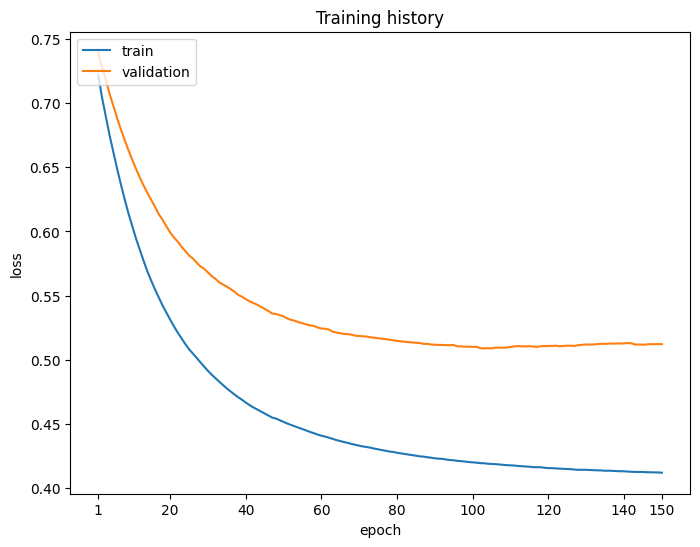

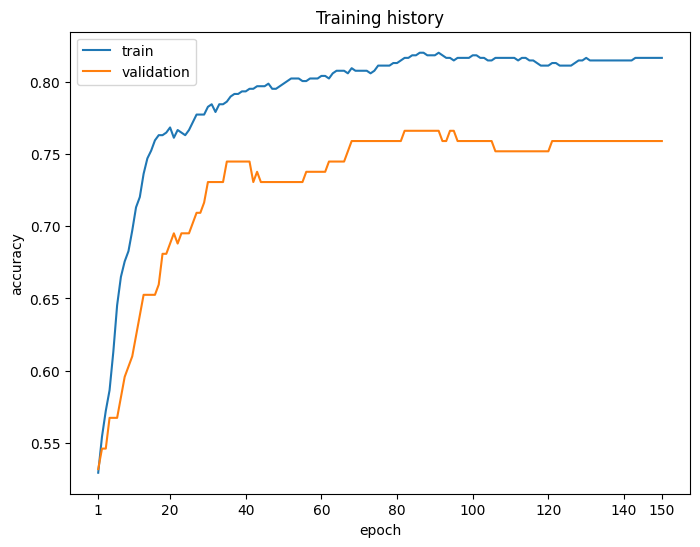

In [16]:
history = model.fit(x=X_train, y=y_train, epochs=150, batch_size=16, validation_split=0.2, verbose=2)
plot_history(history)

### Evaluate Testdata using model

In [17]:
pred = model.predict(X_test)
classes= [1 if i > 0.5  else 0 for i in pred]


10/10 [==============================] - 0s 3ms/step


### Prepare Data for evaluation

In [18]:
result_df = pd.DataFrame(columns=nn_data_raw.columns[:-1])

for i, row in enumerate(X_test):
    data = [i,i]
    data.extend(row)
    result_df.loc[i+1] = data

result_df["LABEL"] = y_test
result_df["PRED"] = classes

result_df.to_csv(result_dir / "ACHE/fe_pca_nn.csv", encoding="utf-8")